In [ ]:
!pip install -q scikit-learn transformers torch sentencepiece fuzzywuzzy python-Levenshtein streamlit pyngrok

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.7/162.7 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 24.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 32.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 23.3 MB/s eta 0:00:00


In [ ]:
!pip install -q cuml-cu11 --extra-index-url=https://pypi.nvidia.com

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 GB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.3/26.3 MB 75.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 GB 28.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.4/134.4 kB 85.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.2/67.2 kB 82.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 567.1/567.1 MB 23.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.9/196.9 MB 47.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 163.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.8/8.8 MB 147.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 452.8/452.8 MB 59.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 169.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.5/36.5 MB 56.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━

**Import the dataset from huggingface**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load the dataset
df = pd.read_csv("hf://datasets/Pablinho/movies-dataset/9000plus.csv")

print(f"check the five rows {df.head()}")
print(f"check the shape {df.shape}")
print(f"check the columns {df.columns}")


check the five rows   Release_Date                    Title  \
0   2021-12-15  Spider-Man: No Way Home   
1   2022-03-01               The Batman   
2   2022-02-25                  No Exit   
3   2021-11-24                  Encanto   
4   2021-12-22           The King's Man   

                                            Overview  Popularity Vote_Count  \
0  Peter Parker is unmasked and no longer able to...    5083.954       8940   
1  In his second year of fighting crime, Batman u...    3827.658       1151   
2  Stranded at a rest stop in the mountains durin...    2618.087        122   
3  The tale of an extraordinary family, the Madri...    2402.201       5076   
4  As a collection of history's worst tyrants and...    1895.511       1793   

  Vote_Average Original_Language                               Genre  \
0          8.3                en  Action, Adventure, Science Fiction   
1          8.1                en            Crime, Mystery, Thriller   
2          6.3                

In [ ]:
# Check for missing values
print(f"missing values {df.isnull().sum()}")

missing values Release_Date          0
Title                 9
Overview              9
Popularity           10
Vote_Count           10
Vote_Average         10
Original_Language    10
Genre                11
Poster_Url           11
dtype: int64


In [ ]:
# Fill missing values in the 'Overview' column
df['Overview'] = df['Overview'].fillna('')

# Drop rows with missing 'Title' and 'Genre'
df = df.dropna(subset=['Title', 'Genre'])

# Fill missing 'Release_Date' with placeholder 'Unknown'
df['Release_Date'] = df['Release_Date'].fillna('Unknown')

# Convert 'Vote_Average' to numeric before filling missing values
df['Vote_Average'] = pd.to_numeric(df['Vote_Average'], errors='coerce')  # Convert to numeric, invalid parsing will be set as NaN
df['Vote_Count'] = pd.to_numeric(df['Vote_Count'], errors='coerce')  # Convert to numeric, invalid parsing will be set as NaN

# Fill missing numerical columns with their median
df['Popularity'] = df['Popularity'].fillna(df['Popularity'].median())
df['Vote_Average'] = df['Vote_Average'].fillna(df['Vote_Average'].median())
df['Vote_Count'] = df['Vote_Count'].fillna(df['Vote_Count'].median())

# Fill missing 'Original_Language' with the most common language
df['Original_Language'] = df['Original_Language'].fillna(df['Original_Language'].mode()[0])

# Fill missing 'Poster_Url' with a placeholder 'No Poster Available'
df['Poster_Url'] = df['Poster_Url'].fillna('No Poster Available')

<ipython-input-6-07ecd61c385a>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Release_Date'] = df['Release_Date'].fillna('Unknown')
<ipython-input-6-07ecd61c385a>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Vote_Average'] = pd.to_numeric(df['Vote_Average'], errors='coerce')  # Convert to numeric, invalid parsing will be set as NaN
<ipython-input-6-07ecd61c385a>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_index

In [ ]:
# Verify that there are no missing values left
print(f"\nMissing values after cleaning:\n{df.isnull().sum()}")


Missing values after cleaning:
Release_Date         0
Title                0
Overview             0
Popularity           0
Vote_Count           0
Vote_Average         0
Original_Language    0
Genre                0
Poster_Url           0
dtype: int64


In [ ]:
print(df['Overview'].head())

0    Peter Parker is unmasked and no longer able to...
1    In his second year of fighting crime, Batman u...
2    Stranded at a rest stop in the mountains durin...
3    The tale of an extraordinary family, the Madri...
4    As a collection of history's worst tyrants and...
Name: Overview, dtype: object


In [ ]:
# Let's convert the text to lowercase
df['Overview'] = df['Overview'].str.lower()
print(df['Overview'].head())

0    peter parker is unmasked and no longer able to...
1    in his second year of fighting crime, batman u...
2    stranded at a rest stop in the mountains durin...
3    the tale of an extraordinary family, the madri...
4    as a collection of history's worst tyrants and...
Name: Overview, dtype: object


<ipython-input-9-b57194a8dbc3>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.values, y=genre_counts.index, palette="viridis")


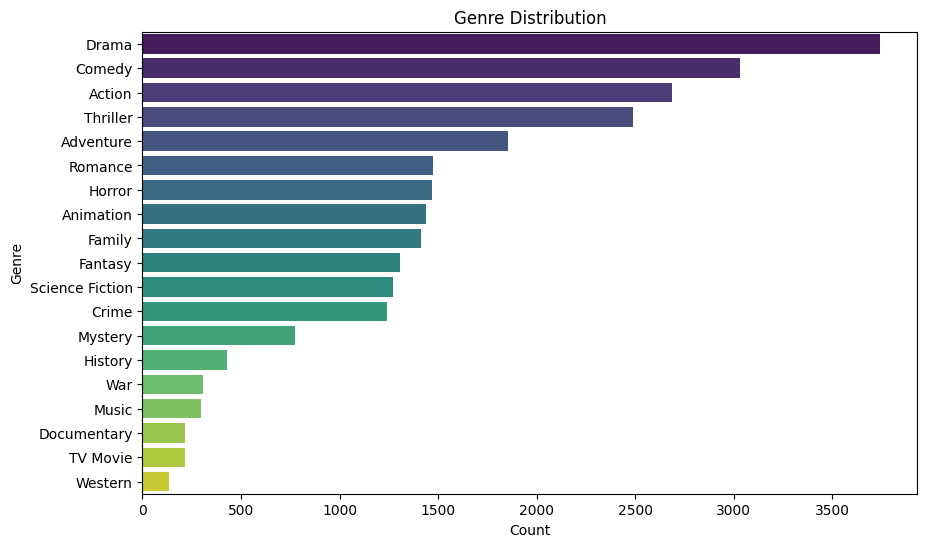

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Split genres into individual categories
df['Genre'] = df['Genre'].str.split(', ')
genre_counts = df.explode('Genre')['Genre'].value_counts()

# Plot genre distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=genre_counts.values, y=genre_counts.index, palette="viridis")
plt.title("Genre Distribution")
plt.xlabel("Count")
plt.ylabel("Genre")
plt.show()

**Apply TF-IDF for Text Representation**

<ipython-input-11-f3bef55adf20>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_scores, y=top_words, palette="magma")


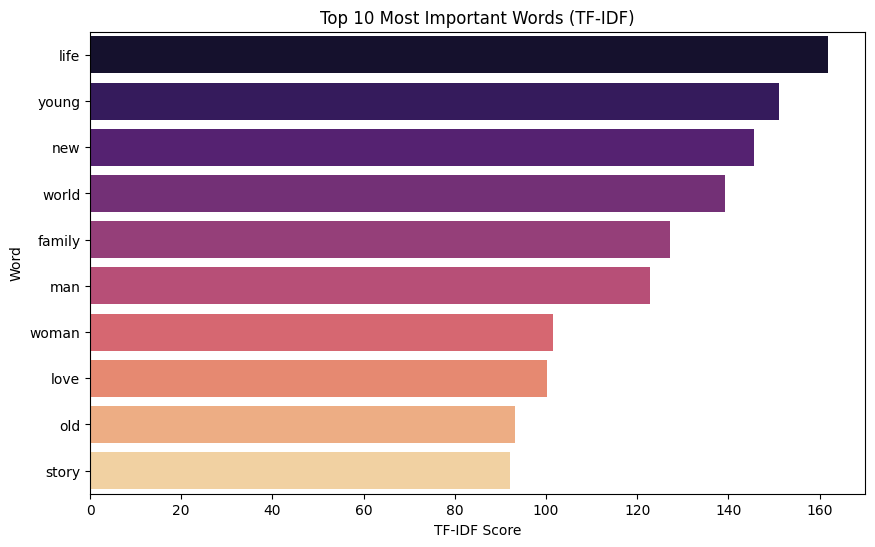

In [ ]:
# Create TF-IDF matrix
tfidf = TfidfVectorizer(stop_words='english', max_features=5000)
tfidf_matrix = tfidf.fit_transform(df['Overview'])

# Get top 10 most important words (features)
feature_names = tfidf.get_feature_names_out()
tfidf_scores = np.asarray(tfidf_matrix.sum(axis=0)).flatten()
top_indices = tfidf_scores.argsort()[-10:][::-1]
top_words = [feature_names[i] for i in top_indices]
top_scores = [tfidf_scores[i] for i in top_indices]

# Plot top words
plt.figure(figsize=(10, 6))
sns.barplot(x=top_scores, y=top_words, palette="magma")
plt.title("Top 10 Most Important Words (TF-IDF)")
plt.xlabel("TF-IDF Score")
plt.ylabel("Word")
plt.show()

**Visualize Popularity vs. Vote Average**

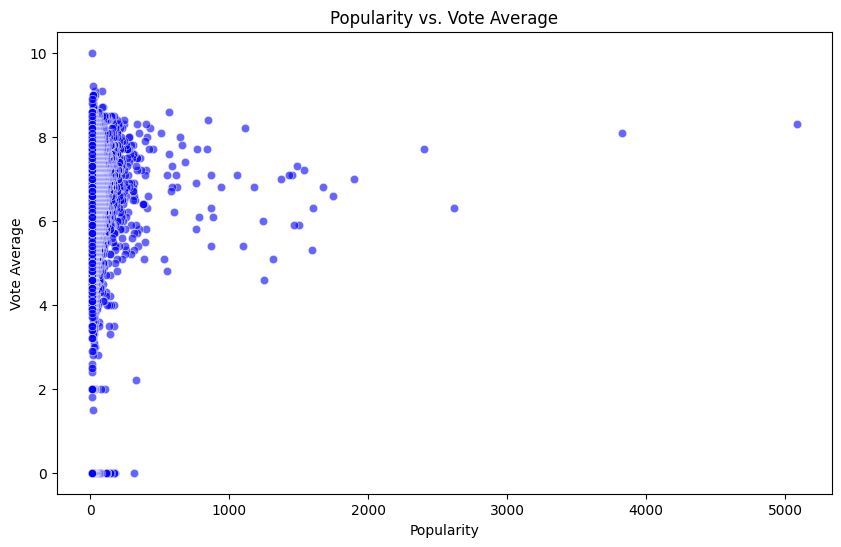

In [ ]:
# Scatter plot of Popularity vs. Vote Average
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Popularity'], y=df['Vote_Average'], alpha=0.6, color='blue')
plt.title("Popularity vs. Vote Average")
plt.xlabel("Popularity")
plt.ylabel("Vote Average")
plt.show()

**Visualize Release Year Distribution**

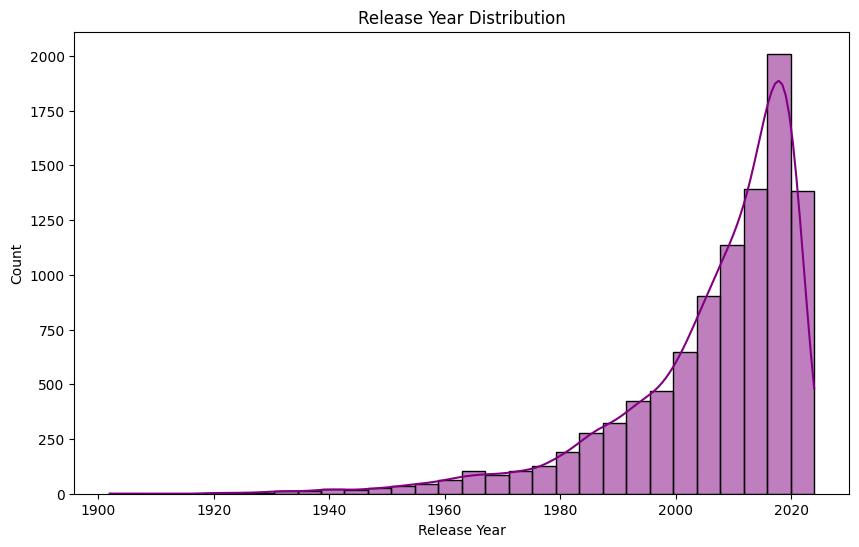

In [ ]:
# Histogram of Release Year
plt.figure(figsize=(10, 6))
sns.histplot(df['Release_Date'].str[:4].astype(int), bins=30, kde=True, color='purple')
plt.title("Release Year Distribution")
plt.xlabel("Release Year")
plt.ylabel("Count")
plt.show()

**Implement Firefly Algorithm**

In [ ]:
import numpy as np

# Define Firefly Algorithm
def firefly_algorithm(tfidf_matrix, num_fireflies=10, max_iter=100):
    # Initialize fireflies (random weights)
    fireflies = np.random.rand(num_fireflies, tfidf_matrix.shape[1])

    for _ in range(max_iter):
        for i in range(num_fireflies):
            for j in range(num_fireflies):
                if np.sum(fireflies[j] ** 2) > np.sum(fireflies[i] ** 2):
                    # Move firefly i towards firefly j
                    r = np.linalg.norm(fireflies[i] - fireflies[j])
                    beta = 1 / (1 + r**2)
                    fireflies[i] += beta * (fireflies[j] - fireflies[i]) + 0.01 * np.random.randn(tfidf_matrix.shape[1])

    # Return the best firefly (weights)
    return fireflies[np.argmax(np.sum(fireflies**2, axis=1))]

# Apply Firefly Algorithm to optimize TF-IDF weights
optimized_weights = firefly_algorithm(tfidf_matrix.toarray())


Enter movie's nameHitman
[{'title': 'Coming 2 America', 'distance': 0.8117993119247651}, {'title': 'The Northman', 'distance': 0.8212051759143624}, {'title': 'Bambi', 'distance': 0.8234221081283893}, {'title': "Nobody's Fool", 'distance': 0.8250407743879316}, {'title': 'The Lion King', 'distance': 0.8267136105997994}]


<ipython-input-18-3772f9053a4e>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=distances, y=titles, palette="viridis")


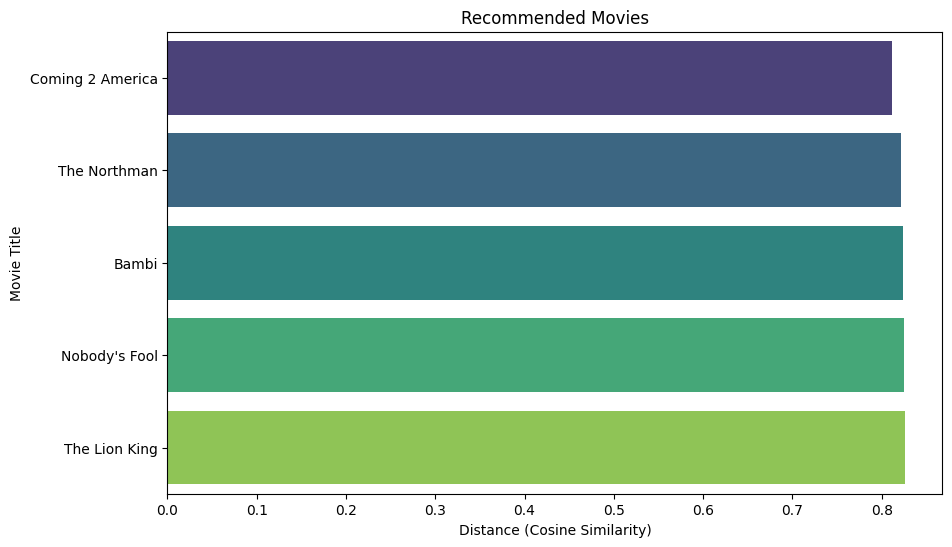

In [ ]:
# Use NearestNeighbors for movie recommendations
knn = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=10)
knn.fit(tfidf_matrix)

def recommend_movies(movie_title, num_recommendations=5):
    # Find movie index
    try:
      movie_index = df[df['Title'].str.lower() == movie_title.lower()].index[0]
    except IndexError:
      print(f"Movie '{movie_title}' not found in the dataset.")
      return []

    distances, indices = knn.kneighbors(tfidf_matrix[movie_index], n_neighbors=num_recommendations+1)

    recommended_movies = []
    for i in range(1, len(distances.flatten())):
        recommended_movies.append({'title': df.iloc[indices.flatten()[i]]['Title'], 'distance': distances.flatten()[i]})

    return recommended_movies

movie_name = input(" Enter movie's name ")
recommendations = recommend_movies(movie_name)
print(recommendations)


# Visualization of recommendations
if recommendations:
  titles = [rec['title'] for rec in recommendations]
  distances = [rec['distance'] for rec in recommendations]
  plt.figure(figsize=(10, 6))
  sns.barplot(x=distances, y=titles, palette="viridis")
  plt.title("Recommended Movies")
  plt.xlabel("Distance (Cosine Similarity)")
  plt.ylabel("Movie Title")
  plt.show()

In [ ]:
from google.colab import userdata
HF_TOKEN = userdata.get('HF_TOKEN')


In [ ]:
from transformers import AutoModelForCausalLM, AutoTokenizer

# Load the grPhi-2/meta-llama/Meta-Llama-3.1-8B-Instruct  model and tokenizer
model_name = "meta-llama/Meta-Llama-3.1-8B-Instruct"  # Use "microsoft/phi-2" if available
tokenizer = AutoTokenizer.from_pretrained(model_name, use_auth_token=HF_TOKEN)
model = AutoModelForCausalLM.from_pretrained(model_name, use_auth_token=HF_TOKEN)

/usr/local/lib/python3.11/dist-packages/transformers/models/auto/tokenization_auto.py:810: FutureWarning: The `use_auth_token` argument is deprecated and will be removed in v5 of Transformers. Please use `token` instead.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/55.4k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.09M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/296 [00:00<?, ?B/s]

/usr/local/lib/python3.11/dist-packages/transformers/models/auto/auto_factory.py:471: FutureWarning: The `use_auth_token` argument is deprecated and will be removed in v5 of Transformers. Please use `token` instead.
  warnings.warn(


config.json:   0%|          | 0.00/855 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/23.9k [00:00<?, ?B/s]

model-00001-of-00004.safetensors:   0%|          | 0.00/4.98G [00:00<?, ?B/s]

model-00002-of-00004.safetensors:   0%|          | 0.00/5.00G [00:00<?, ?B/s]

model-00003-of-00004.safetensors:   0%|          | 0.00/4.92G [00:00<?, ?B/s]

model-00004-of-00004.safetensors:   0%|          | 0.00/1.17G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/184 [00:00<?, ?B/s]

In [ ]:
def generate_recommendations(query, recommendations):
    # Create a clear and specific prompt for Phi-2/Llama-3.1-8B-Instruct
    prompt = f"Recommend movies similar to '{query}'. Here are some options: {', '.join(recommendations)}. Explain why these movies are similar in terms of genre, theme, or style."

    # Tokenize the input prompt
    inputs = tokenizer(prompt, return_tensors="pt", max_length=512, truncation=True)

    # Generate the response
    outputs = model.generate(inputs["input_ids"], max_length=200, num_beams=5, early_stopping=True)

    # Decode the generated text
    response = tokenizer.decode(outputs[0], skip_special_tokens=True)

    return response

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# Compute cosine similarity matrix
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Display the shape of the similarity matrix
print(f"Cosine Similarity Matrix Shape: {cosine_sim.shape}")

Cosine Similarity Matrix Shape: (9826, 9826)


In [ ]:
from fuzzywuzzy import process

# Create a mapping of lowercase movie titles to their indices
indices = pd.Series(df.index, index=df['Title'].str.lower()).drop_duplicates()

def get_recommendations(title, cosine_sim=cosine_sim, top_n=5):
    # Convert input title to lowercase
    title = title.lower()

    # Use fuzzy matching to find the closest matching title
    match, score = process.extractOne(title, indices.index)

    # If the match score is too low, assume the title is not in the dataset
    if score < 70:  # Adjust the threshold as needed
        raise KeyError(f"Sorry, I couldn't find '{title}' in the database.")

    # Get the index of the matched movie
    idx = indices[match]

    # Get the pairwise similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the top_n most similar movies
    sim_scores = sim_scores[1:top_n+1]  # Exclude the movie itself

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top_n most similar movies
    return df['Title'].iloc[movie_indices]

In [ ]:
def recommend_movie(title):
    # Get recommendations using TF-IDF and cosine similarity
    recommendations = get_recommendations(title)

    # Generate a natural language response using Phi-2/Llama-3.1-8B-Instruct
    response = generate_recommendations(title, recommendations)

    return response

# Example usage
query = "The Batman"
print(recommend_movie(query))

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.


Recommend movies similar to 'The Batman'. Here are some options: Batman: The Long Halloween, Part Two, Batman Beyond: The Movie, Batman: Gotham by Gaslight, Batman: The Long Halloween, Part One, Batman: The Dark Knight Returns, Part 1. Explain why these movies are similar in terms of genre, theme, or style. 

Here are some movies similar to 'The Batman' that you might enjoy:

1.  **Batman: The Long Halloween, Part Two**: This movie is a direct sequel to Part One and continues the story of Batman's early days as a crimefighter. Like 'The Batman', it's a dark and gritty take on the character, with a focus on his detective work and his battles against the villainous Carmine Falcone.

2.  **Batman Beyond: The Movie**: This animated film is set in a future where Bruce Wayne has passed on the mantle of Batman to a young hero named Terry McGinnis. Like 'The


In [ ]:
def chatbot():
    print("Welcome to the Movie Recommendation Chatbot!")
    while True:
        query = input("Enter a movie title (or type 'exit' to quit): ")
        if query.lower() == 'exit':
            print("Goodbye!")
            break
        try:
            response = recommend_movie(query)
            print(response)
        except KeyError as e:
            print(e)  # Display the error message from get_recommendations
            print("Please try another title.")

# Run the chatbot
chatbot()

In [ ]:
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd
# Save preprocessed data and models
with open('preprocessed_data.pkl', 'wb') as f:
    pickle.dump({
        'df': df,
        'tfidf': tfidf,
        'tfidf_matrix': tfidf_matrix,
        'cosine_sim': cosine_sim,
        'indices': indices
    }, f)

print("Preprocessed data and models saved to 'preprocessed_data.pkl'.")

Preprocessed data and models saved to 'preprocessed_data.pkl'.


In [ ]:
%%writefile app.py
import streamlit as st
import pickle
from transformers import AutoModelForCausalLM, AutoTokenizer
from fuzzywuzzy import process
import torch

# Check if GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Load preprocessed data and models
@st.cache_data
def load_preprocessed_data():
    with open('preprocessed_data.pkl', 'rb') as f:
        data = pickle.load(f)
    return data['df'], data['tfidf'], data['tfidf_matrix'], data['cosine_sim'], data['indices']

df, tfidf, tfidf_matrix, cosine_sim, indices = load_preprocessed_data()

# Load the phi-1.5 model and tokenizer
@st.cache_resource
def load_model():
    model_name = "meta-llama/Meta-Llama-3.1-8B-Instruct"
    tokenizer = AutoTokenizer.from_pretrained(model_name)
    model = AutoModelForCausalLM.from_pretrained(model_name).to(device)  # Move model to the correct device
    return tokenizer, model

tokenizer, model = load_model()

# Function to get recommendations
def get_recommendations(title, cosine_sim=cosine_sim, top_n=5):
    title = title.lower()
    match, score = process.extractOne(title, indices.index)
    if score < 70:
        suggestions = process.extract(title, indices.index, limit=3)
        suggestions = [s[0] for s in suggestions]
        raise KeyError(f"Sorry, I couldn't find '{title}'. Did you mean: {', '.join(suggestions)}?")
    idx = indices[match]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:top_n+1]
    movie_indices = [i[0] for i in sim_scores]
    return df['Title'].iloc[movie_indices]

# Function to generate recommendations using Phi-2/Llama-3.1-8B-Instruct
def generate_recommendations(query, recommendations):
    # Create a clear and concise prompt
    prompt = (
        f"Recommend movies similar to '{query}'. Here are some options: {', '.join(recommendations)}. "
        f"Explain why these movies are similar in terms of genre, theme, or style."
    )

    # Tokenize the input prompt and move to the same device as the model
    inputs = tokenizer(prompt, return_tensors="pt", max_length=512, truncation=True).to(device)

    # Generate the response
    outputs = model.generate(inputs["input_ids"], max_length=200, num_beams=5, early_stopping=True)

    # Decode the generated text
    response = tokenizer.decode(outputs[0], skip_special_tokens=True)

    return response

# Streamlit app
st.title("🎬 Movie Recommendation Chatbot")

# User input
query = st.text_input("Enter a movie title (or type 'exit' to quit):")

if query:
    if query.lower() == 'exit':
        st.write("Goodbye!")
    else:
        try:
            recommendations = get_recommendations(query)
            response = generate_recommendations(query, recommendations)
            st.write(response)
        except KeyError as e:
            st.error(e)
            st.write("Please try another title.")

Overwriting app.py


In [ ]:
import torch

# Check if GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda


In [ ]:
from google.colab import userdata
NG_TOKEN = userdata.get('NG_TOKEN')

In [ ]:
from pyngrok import ngrok
import subprocess
import time

process = subprocess.Popen(["streamlit", "run", "app.py"])
time.sleep(5)

ngrok.set_auth_token("NG_TOKEN")
tunnel = ngrok.connect(8501, "http")
print(f"Your app is live at: {tunnel.public_url}")

Your app is live at: https://a960-34-125-71-71.ngrok-free.app


In [ ]:
kill_process = ngrok.kill()